In [ ]:
import numpy as np
import csv
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
with open('mnist_train.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

data = data[1:]
data = [a[1:] for a in data]

In [ ]:
xs = np.array(data).reshape((60000, 28, 28, 1)).astype(int)/255
ys = xs

print(xs.shape)
print(ys.shape)

In [ ]:
import pickle

with open('./xs','wb') as f: pickle.dump(xs, f)
with open('./ys','wb') as f: pickle.dump(ys, f)

In [ ]:
l = tf.keras.layers

model = tf.keras.models.Sequential([
    l.Conv2D(filters=4, kernel_size=3, padding='valid', input_shape=(28, 28, 1)),
    l.Conv2D(filters=2, kernel_size=3, padding='valid'),
    l.Conv2D(filters=1, kernel_size=3, padding='valid'),
    l.Conv2D(filters=1, kernel_size=3, padding='valid'),

    l.Flatten(),

    l.Dense(100, activation='relu'),
    l.Dropout(0.3),


    l.Dense(2, activation='tanh'),


    l.Dense(100, activation='relu'),
    l.Dropout(0.3),

    l.Dense(20*20*4, activation='relu'),
    l.Reshape((20, 20, 4)),

    l.Conv2DTranspose(filters=4, kernel_size=3, padding='valid'),
    l.Conv2DTranspose(filters=2, kernel_size=3, padding='valid'),
    l.Conv2DTranspose(filters=1, kernel_size=3, padding='valid'),
    l.Conv2DTranspose(filters=1, kernel_size=3, padding='valid')
])

model.summary()

model.compile(optimizer='adam', loss='mse')

In [129]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_131 (Conv2D)          (None, 26, 26, 4)         40        
_________________________________________________________________
conv2d_132 (Conv2D)          (None, 24, 24, 2)         74        
_________________________________________________________________
conv2d_133 (Conv2D)          (None, 22, 22, 1)         19        
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 20, 20, 1)         10        
_________________________________________________________________
flatten_31 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 100)               40100     
_________________________________________________________________
dropout_49 (Dropout)         (None, 100)             

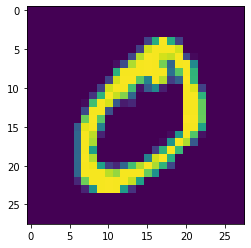

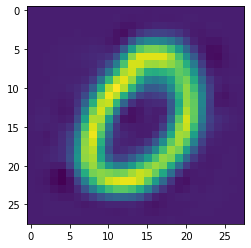

In [112]:
plt.imshow(xs[1])
plt.show()

x = np.array([xs[1]])
plt.imshow(model.predict(x)[0])
plt.show()

In [ ]:
model.fit(xs, ys)

In [ ]:
model.save('./model.h5')

In [ ]:
model = tf.keras.models.load_model('./model.h5')

In [110]:
l = tf.keras.layers

encoder = tf.keras.models.Sequential([
    l.Conv2D(filters=4, kernel_size=3, padding='valid', input_shape=(28, 28, 1)),
    l.Conv2D(filters=2, kernel_size=3, padding='valid'),
    l.Conv2D(filters=1, kernel_size=3, padding='valid'),
    l.Conv2D(filters=1, kernel_size=3, padding='valid'),

    l.Flatten(),

    l.Dense(100, activation='relu'),
    l.Dropout(0.3),


    l.Dense(2, activation='tanh')
])

encoder.summary()

for i in range(8):
    encoder.layers[i].set_weights(model.layers[i].get_weights())

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_163 (Conv2D)          (None, 26, 26, 4)         40        
_________________________________________________________________
conv2d_164 (Conv2D)          (None, 24, 24, 2)         74        
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 22, 22, 1)         19        
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 20, 20, 1)         10        
_________________________________________________________________
flatten_39 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_127 (Dense)            (None, 100)               40100     
_________________________________________________________________
dropout_62 (Dropout)         (None, 100)             

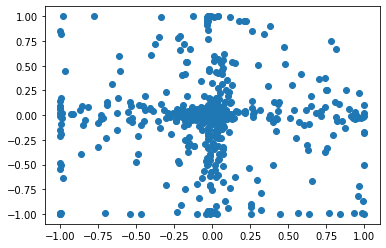

In [122]:
out = encoder.predict(xs[:500]).reshape(2, 500)

plt.scatter(out[0],out[1])
plt.show()

In [128]:
l = tf.keras.layers

decoder = tf.keras.models.Sequential([
    l.Dense(100, activation='relu', input_shape=(2,)),
    l.Dropout(0.3),

    l.Dense(20*20*4, activation='relu'),
    l.Reshape((20, 20, 4)),

    l.Conv2DTranspose(filters=4, kernel_size=3, padding='valid'),
    l.Conv2DTranspose(filters=2, kernel_size=3, padding='valid'),
    l.Conv2DTranspose(filters=1, kernel_size=3, padding='valid'),
    l.Conv2DTranspose(filters=1, kernel_size=3, padding='valid')
])

decoder.summary()

for i in range(8):
    encoder.layers[i].set_weights(model.layers[i+9].get_weights())

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 100)               300       
_________________________________________________________________
dropout_68 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_140 (Dense)            (None, 1600)              161600    
_________________________________________________________________
reshape_31 (Reshape)         (None, 20, 20, 4)         0         
_________________________________________________________________
conv2d_transpose_102 (Conv2D (None, 22, 22, 4)         148       
_________________________________________________________________
conv2d_transpose_103 (Conv2D (None, 24, 24, 2)         74        
_________________________________________________________________
conv2d_transpose_104 (Conv2D (None, 26, 26, 1)       

ValueError: You called `set_weights(weights)` on layer "conv2d_163" with a weight list of length 0, but the layer was expecting 2 weights. Provided weights: []...